In [4]:
using Pkg
Pkg.activate(".")

using JLD2, Plots, Lux, QuadGK, ComponentArrays, PhasorNetworks

  Activating project at `~/code/phasor_julia`


# Load the trained networks

In [15]:
result_dir = "parameters"

"parameters"

In [16]:
all_results = readdir(result_dir);

In [17]:
function ode_result(filename)
    pattern = r"^ode"
    return occursin(pattern, filename)
end

function pmlp_result(filename)
    pattern = r"^pmlp"
    return occursin(pattern, filename)
end

function mlp_result(filename)
    pattern = r"^mlp"
    return occursin(pattern, filename)
end

mlp_result (generic function with 1 method)

In [18]:
mlp_files = all_results[findall(mlp_result.(all_results))]
pmlp_files = all_results[findall(pmlp_result.(all_results))]
ode_files = all_results[findall(ode_result.(all_results))];

In [20]:
mlps = [load_object(joinpath(result_dir, f)) for f in mlp_files]
pmlps = [load_object(joinpath(result_dir, f)) for f in pmlp_files]
odes = [load_object(joinpath(result_dir, f)) for f in ode_files];

In [23]:
mlps[1]["auroc static"]

0.8327311530758456

In [31]:
auroc_mlps = [n["auroc static"] for n in mlps]
auroc_pmlps_static = [n["auroc static"] for n in pmlps]
auroc_pmlps_dynamic = [n["auroc dynamic"] for n in pmlps]
auroc_odes_static = [n["auroc static"] for n in odes]
auroc_odes_dynamic = [n["auroc dynamic"] for n in odes];

In [26]:
using StatsPlots

In [47]:
ode_files[argmax(conversion_error_ode[1])]

"ode_id_62.jld2"

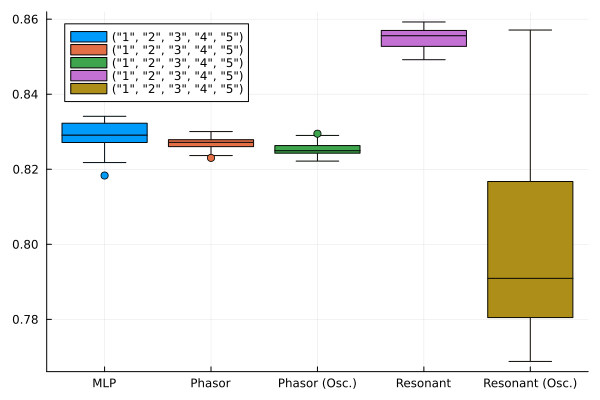

In [38]:
boxplot(stack((auroc_mlps, auroc_pmlps_static, auroc_pmlps_dynamic, auroc_odes_static, auroc_odes_dynamic), dims=2), label=("1", "2", "3", "4", "5"))
xticks!([1.0, 2.0, 3.0, 4.0, 5.0], ["MLP", "Phasor", "Phasor (Osc.)", "Resonant", "Resonant (Osc.)"])

In [41]:
conversion_error_pmlp = [auroc_pmlps_static .- auroc_pmlps_dynamic];
conversion_error_ode = [auroc_odes_static .- auroc_odes_dynamic];

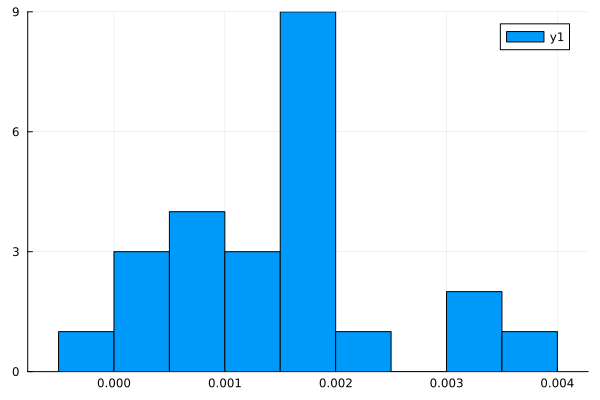

In [43]:
histogram(conversion_error_pmlp)

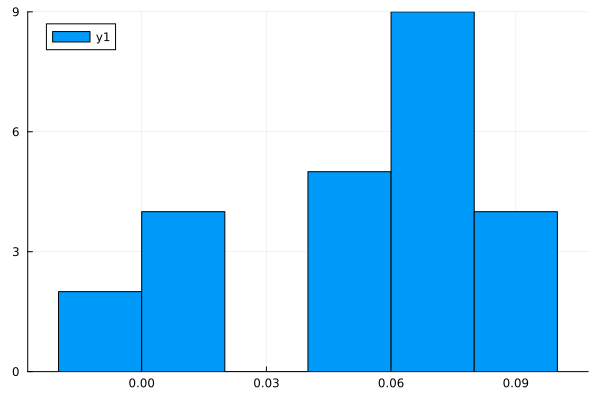

In [42]:
histogram(conversion_error_ode)

In [33]:
using HypothesisTests

In [34]:
MannWhitneyUTest(auroc_pmlps_static, auroc_pmlps_dynamic)

Exact Mann-Whitney U test
-------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.00221846

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0027

Details:
    number of observations in each group: [24, 24]
    Mann-Whitney-U statistic:             431.0
    rank sums:                            [731.0, 445.0]
    adjustment for ties:                  0.0


In [40]:
MannWhitneyUTest(auroc_mlps, auroc_pmlps_static)

Exact Mann-Whitney U test
-------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.00192446

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0052

Details:
    number of observations in each group: [24, 24]
    Mann-Whitney-U statistic:             422.0
    rank sums:                            [722.0, 454.0]
    adjustment for ties:                  0.0
